In [ ]:
!pip install datasets

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
df['job_posted_month'] = df['job_posted_date'].dt.month
monthly_counts = df['job_posted_month'].value_counts()

monthly_counts = monthly_counts.sort_index()

monthly_counts

,count
job_posted_month,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


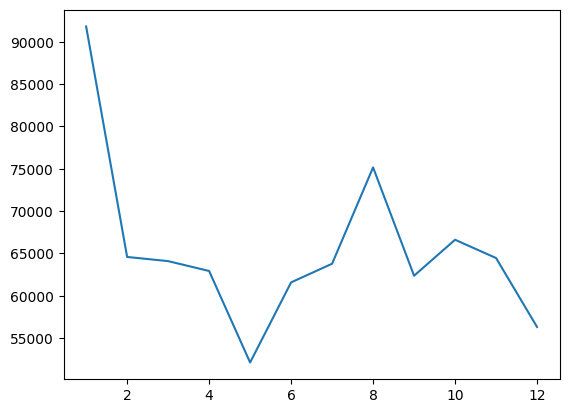

In [ ]:
plt.plot(monthly_counts.index, monthly_counts.values)
plt.show()

In [ ]:
job_counts = df.job_title_short.value_counts(ascending = True)
job_counts

,count
job_title_short,
Cloud Engineer,12331
Machine Learning Engineer,14080
Senior Data Analyst,29216
Senior Data Scientist,36957
Senior Data Engineer,44563
Software Engineer,44929
Business Analyst,49063
Data Scientist,172286
Data Engineer,186241


<BarContainer object of 10 artists>

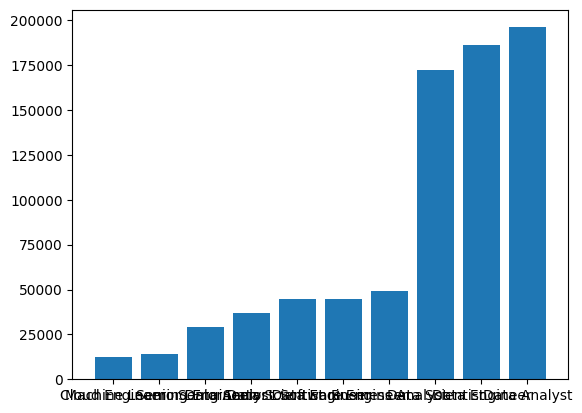

In [ ]:
plt.bar(job_counts.index, job_counts)

<BarContainer object of 10 artists>

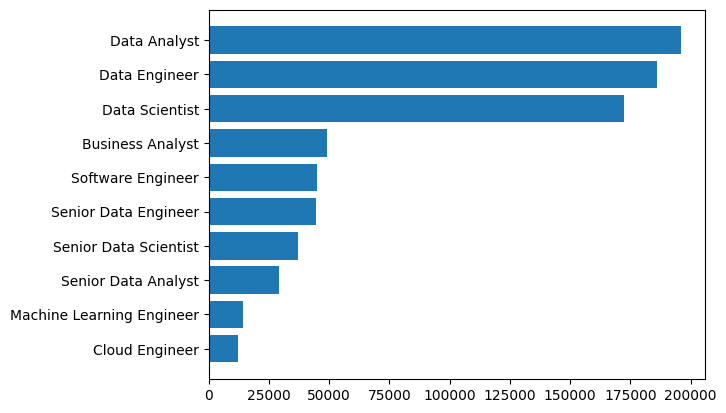

In [ ]:
plt.barh(job_counts.index, job_counts)

<BarContainer object of 5 artists>

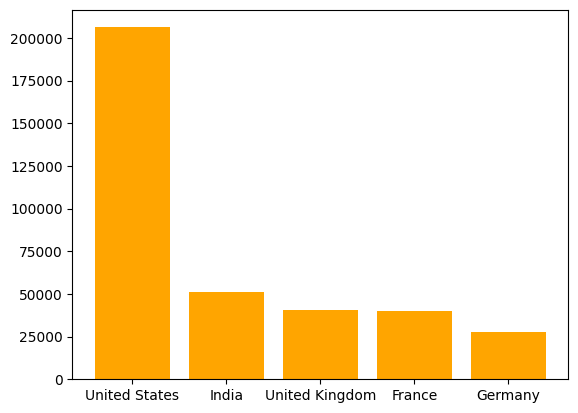

In [ ]:
location_counts = df.job_country.value_counts().head(5)
plt.bar(location_counts.index, location_counts, color = 'orange')

<BarContainer object of 10 artists>

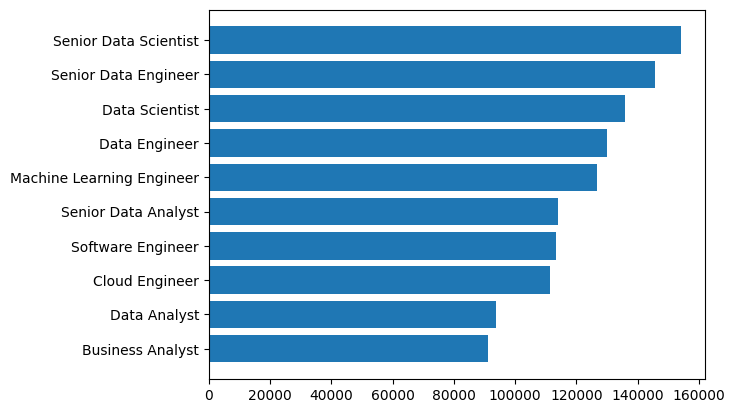

In [ ]:
job_salary = df.groupby('job_title_short')['salary_year_avg'].mean()
job_salary = job_salary.sort_values(ascending = True)
plt.barh(job_salary.index, job_salary.values)

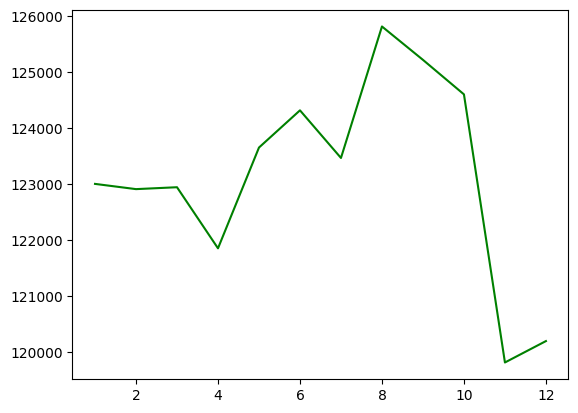

In [ ]:
job_posted_month = df.job_posted_date.dt.month
job_posted_month = job_posted_month.sort_values()

month_salary = df.groupby(job_posted_month)['salary_year_avg'].mean()
plt.plot(month_salary.index, month_salary.values, color = 'green')

<BarContainer object of 10 artists>

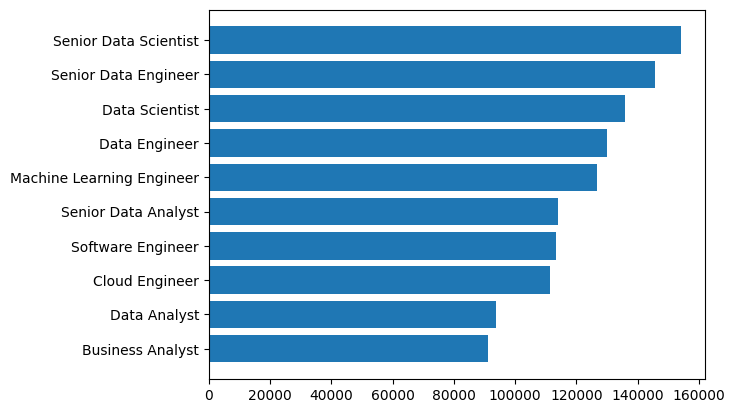

In [ ]:
title_salary = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending = True)
plt.barh(title_salary.index, title_salary.values)

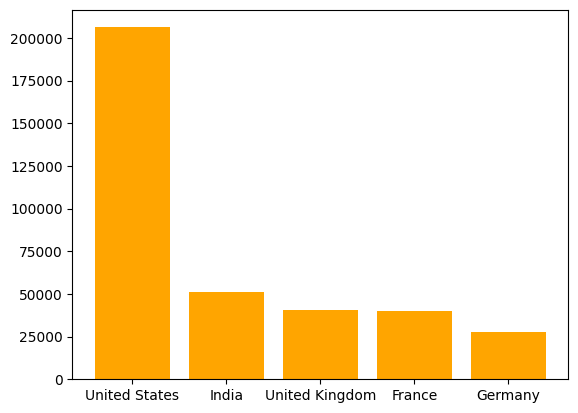

In [ ]:
country_job = df.job_country.value_counts().head(5)
plt.bar(country_job.index, country_job.values, color = 'orange')
plt.show()

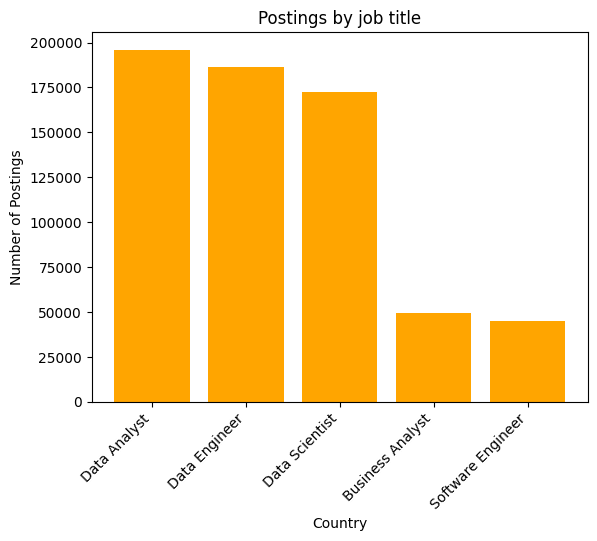

In [ ]:
job_counts = df.job_title_short.value_counts().head()
job_counts
plt.bar(job_counts.index, job_counts, color = 'orange')
plt.title('Postings by job title')
plt.xlabel('Country')
plt.ylabel('Number of Postings')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Text(0.5, 0, 'Average Salary')

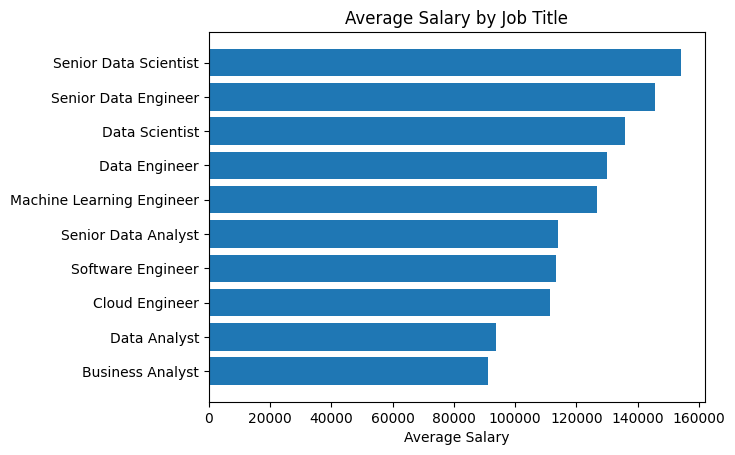

In [ ]:
title_salary = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending = True)
plt.barh(title_salary.index, title_salary.values)
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary')

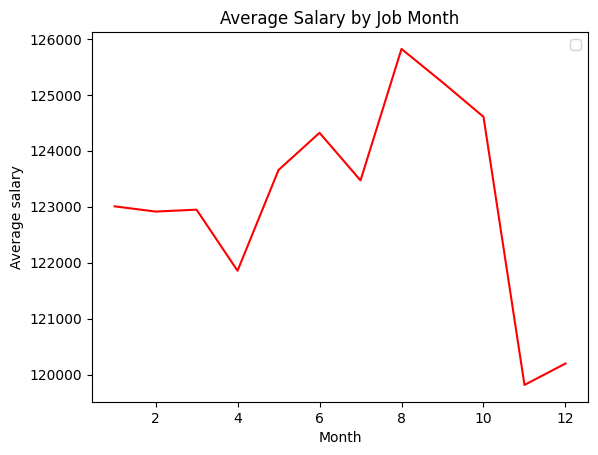

In [ ]:
job_posted_month = df.job_posted_date.dt.month.sort_values()
salary_trend = df.groupby(job_posted_month)['salary_year_avg'].mean()
plt.plot(salary_trend.index, salary_trend.values, color = 'red')
plt.xlabel('Month')
plt.ylabel('Average salary')
plt.title('Average Salary by Job Month')
plt.legend()
plt.show()

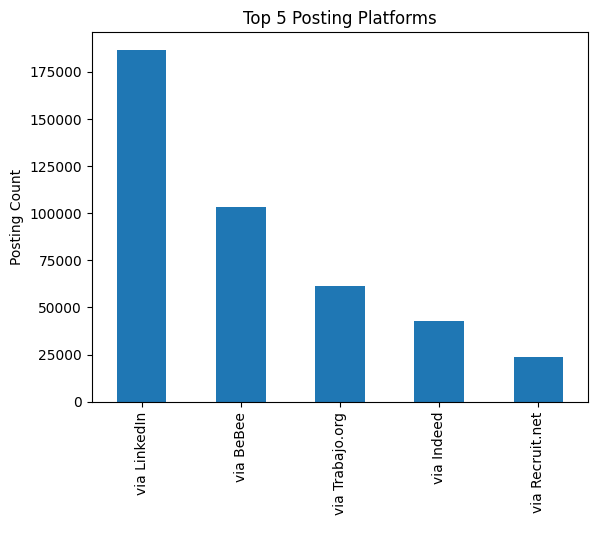

In [ ]:
top_platform = df.job_via.value_counts().sort_values(ascending = False).head(5)
top_platform.plot(kind = 'bar')
plt.xlabel(' ')
plt.ylabel('Posting Count')
plt.title('Top 5 Posting Platforms')
plt.show()

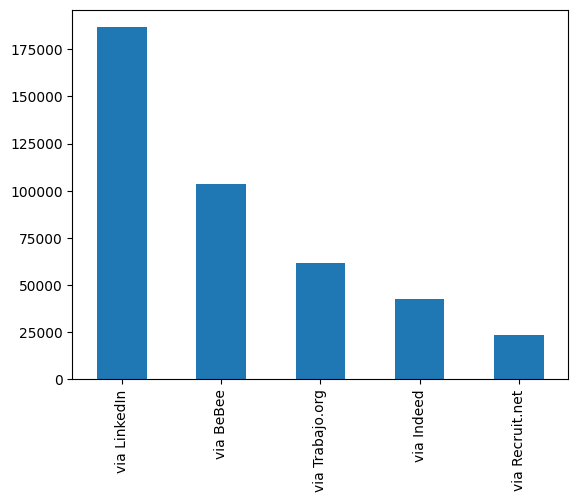

In [ ]:
top_5_posting_platforms = df.groupby('job_via')['job_title_short'].count().sort_values(ascending=False).head(5)
top_5_posting_platforms.plot(kind='bar',xlabel='')
plt.show()

In [ ]:
#job_posted_month = df.job_posted_date.dt.month
#df.groupby(job_posted_month)[job_posted_month]

Text(0.5, 1.0, 'Trend of Job Postings Over Time')

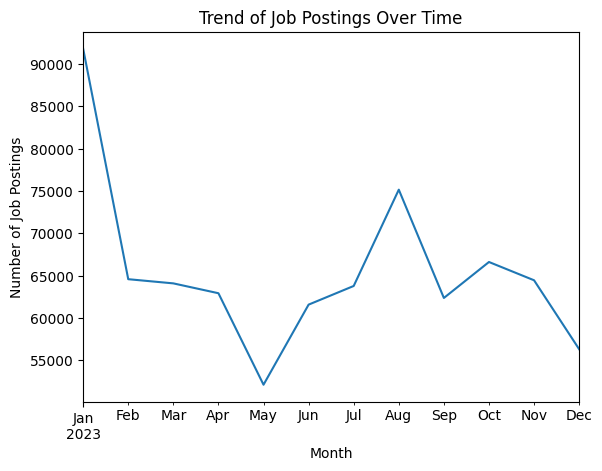

In [ ]:
monthly_job_counts = df.job_posted_date.dt.to_period('M').value_counts().sort_index()
monthly_job_counts.plot(kind = 'line')
plt.xlabel("Month")
plt.ylabel("Number of Job Postings")
plt.title("Trend of Job Postings Over Time")

Text(0.5, 1.0, 'Number of Job Postings by Job Location')

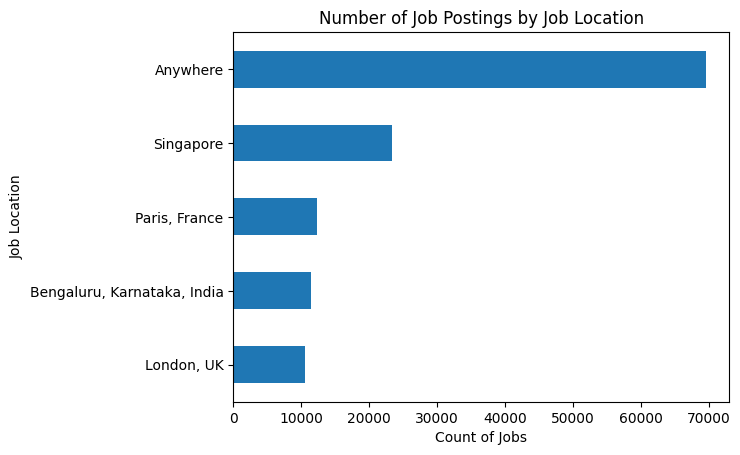

In [ ]:
posting_location = df.job_location.value_counts().head(5).sort_values(ascending = True)
posting_location.plot(kind = 'barh')
plt.xlabel('Count of Jobs')
plt.ylabel('Job Location')
plt.title('Number of Job Postings by Job Location')

Text(0.5, 1.0, 'Median Salary by Job Title')

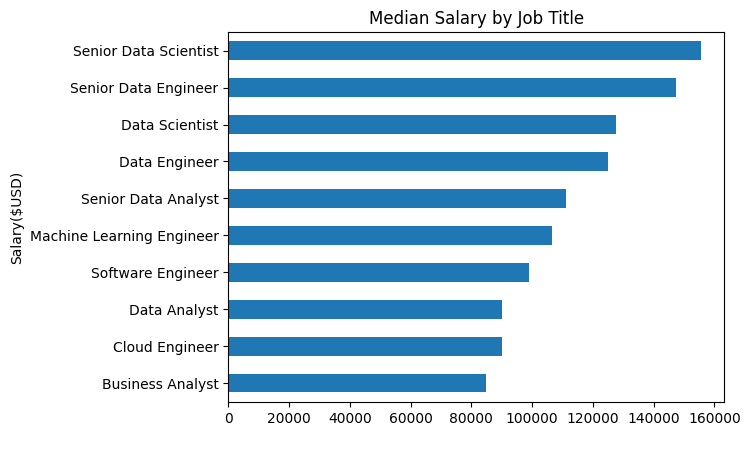

In [ ]:
title_salary = df.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = True)
title_salary.plot(kind = 'barh')
plt.xlabel(' ')
plt.ylabel('Salary($USD)')
plt.title('Median Salary by Job Title')